In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

df = pd.read_csv('data/movie_data.csv', sep=';')

## Genres Plot

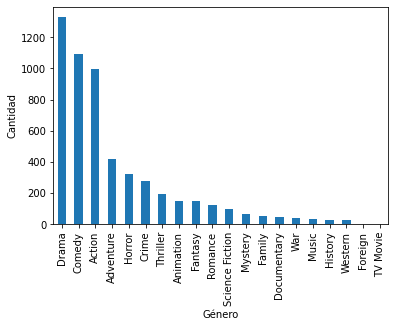

In [2]:
# plot the number of movies per genre
df['genres'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.show()

## Top 10 movies by popularity

In [4]:
# top 10 movies by popularity
df.sort_values(by='popularity', ascending=False).head(10)

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
5142,97000000.0,Action,tt3315342,Logan,"In the near future, a weary Logan cares for an...",54.581997,4.0,1.0,2017-02-28,6.168018e+08,137.0,2.0,7.6,6310.0
4421,170000000.0,Action,tt2015381,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",53.291601,4.0,2.0,2014-07-30,7.733286e+08,121.0,1.0,7.9,10014.0
5018,5500000.0,Drama,tt2932536,47 Meters Down,Two sisters on Mexican vacation are trapped in...,52.854103,4.0,1.0,2017-06-15,4.423502e+07,89.0,1.0,5.1,548.0
5360,25000000.0,Drama,tt0111161,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,NaN,1.0,1994-09-23,2.834147e+07,142.0,1.0,8.5,8358.0
118,25000000.0,Drama,tt0111161,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,NaN,1.0,1994-09-23,2.834147e+07,142.0,1.0,8.5,8358.0
5235,60000000.0,Action,tt1648190,The Dark Tower,"The last Gunslinger, Roland Deschain, has been...",50.903593,4.0,2.0,2017-08-03,7.100000e+07,95.0,1.0,5.7,688.0
5140,40000000.0,Thriller,tt4425200,John Wick: Chapter 2,John Wick is forced out of retirement by a for...,49.247505,3.0,1.0,2017-02-08,1.715399e+08,122.0,2.0,6.7,2924.0
5181,250000000.0,Action,tt4630562,The Fate of the Furious,When a mysterious woman seduces Dom into the w...,48.573287,3.0,1.0,2017-04-12,1.238765e+09,136.0,1.0,6.8,3803.0
132,55000000.0,Comedy,tt0109830,Forrest Gump,A man with a low IQ has accomplished great thi...,48.307194,1.0,1.0,1994-07-06,6.779454e+08,142.0,1.0,8.2,8147.0
5374,55000000.0,Comedy,tt0109830,Forrest Gump,A man with a low IQ has accomplished great thi...,48.307194,1.0,1.0,1994-07-06,6.779454e+08,142.0,1.0,8.2,8147.0


## Top 10 movies by vote average

In [5]:
df.sort_values(by='vote_average', ascending=False).head(10)

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
2600,13200000.0,Comedy,tt0112870,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",34.457024,1.0,1.0,1995-10-20,100000000.0,190.0,1.0,9.1,661.0
4834,1500000.0,Music,tt5190958,कट्यार काळजात घुसली,Katyar Kaljat Ghusli is a 2015 Marathi film ba...,0.446454,0.0,1.0,2015-11-12,4400000.0,162.0,2.0,9.0,2.0
5188,64200.0,Comedy,tt0253828,Tosun Paşa,Late 19th century in Alexandria. Two tradition...,0.915970,1.0,1.0,1976-01-01,698200.0,94.0,1.0,8.6,10.0
4875,722083.0,History,tt3037582,Поводир,American boy Peter and blind minstrel Ivan are...,0.817488,0.0,1.0,2014-11-12,499168.0,120.0,3.0,8.6,6.0
118,25000000.0,Drama,tt0111161,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,NaN,1.0,1994-09-23,28341469.0,142.0,1.0,8.5,8358.0
273,6000000.0,Drama,tt0068646,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,2.0,1.0,1972-03-14,245066411.0,175.0,3.0,8.5,6024.0
2084,10500000.0,Drama,tt0108320,There Goes My Baby,A group of high school seniors meets in the su...,0.377787,1.0,1.0,1994-09-02,123509.0,99.0,1.0,8.5,2.0
5360,25000000.0,Drama,tt0111161,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,NaN,1.0,1994-09-23,28341469.0,142.0,1.0,8.5,8358.0
1866,300000.0,Adventure,tt0082464,Goodbye Pork Pie,Gerry hires a car in Kaitaia with a stolen lic...,1.023164,6.0,1.0,1981-02-05,1400000.0,105.0,1.0,8.5,4.0
824,20000000.0,Comedy,tt0118799,La vita è bella,A touching story of an Italian book seller of ...,39.394970,2.0,1.0,1997-12-20,229400000.0,116.0,3.0,8.3,3643.0


## Vote Average vs Popularity

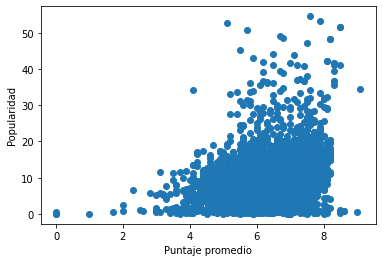

In [6]:
# plot vote_average vs popularity
plt.scatter(df['vote_average'], df['popularity'])
plt.xlabel('Puntaje promedio')
plt.ylabel('Popularidad')
plt.show()

## Revenue vs Vote Average

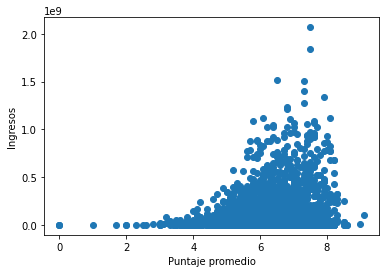

In [7]:
# plot revenue vs vote_average
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Puntaje promedio')
plt.ylabel('Ingresos')
plt.show()

## Vote Average vs Budget

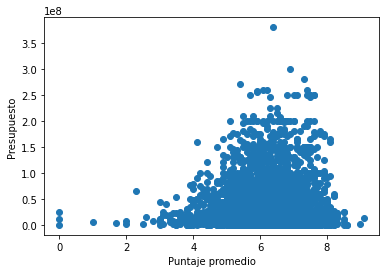

In [8]:
# plot vote_average vs budget
plt.scatter(df['vote_average'], df['budget'])
plt.xlabel('Puntaje promedio')
plt.ylabel('Presupuesto')
plt.show()

## Budget histogram

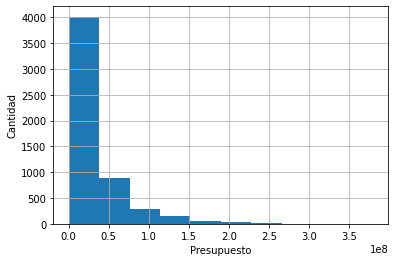

In [9]:
# plot a bugdet histogram
df['budget'].hist()
plt.xlabel('Presupuesto')
plt.ylabel('Cantidad')
plt.show()

## Información Faltante

<AxesSubplot:>

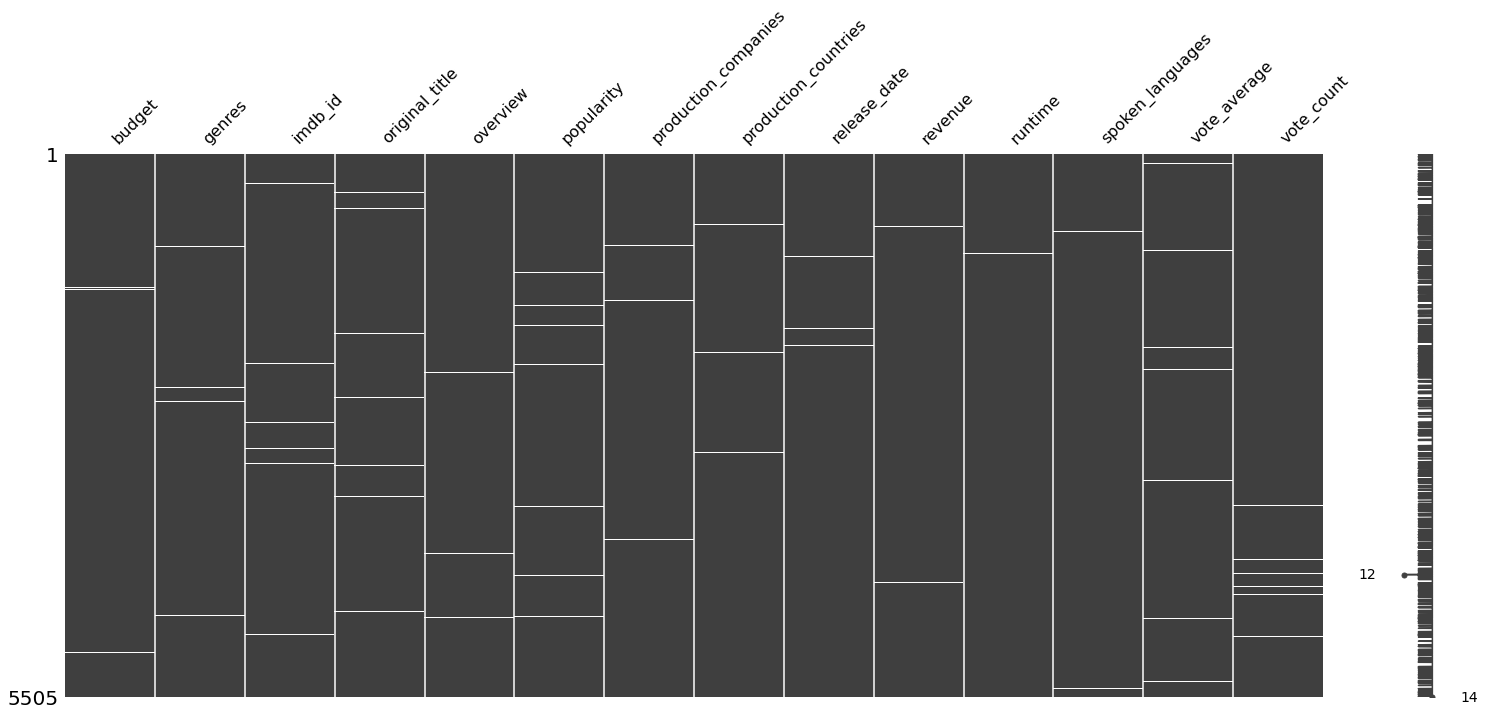

In [13]:
msno.matrix(df)

<AxesSubplot:>

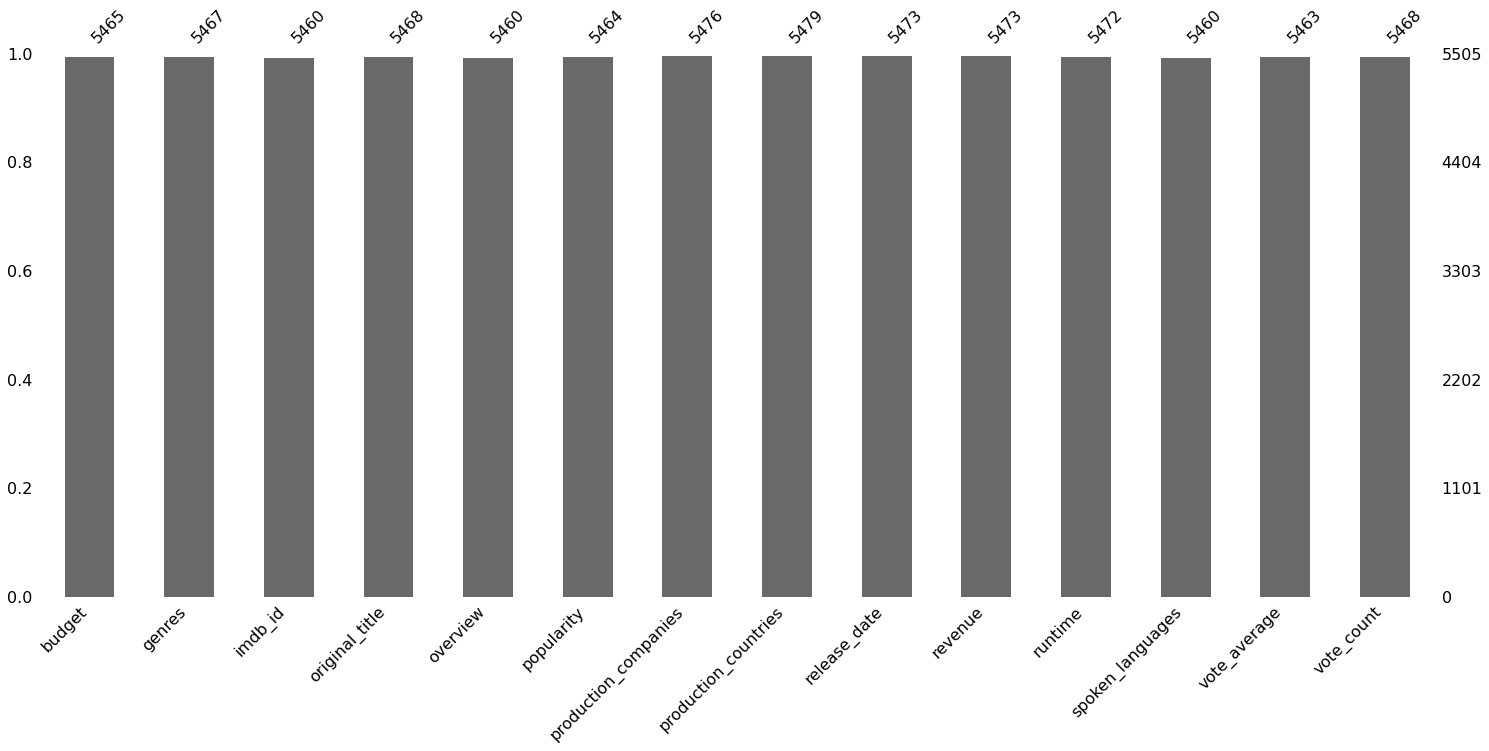

In [12]:
msno.bar(df)

In [16]:
df.describe()

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
count,5.465000e+03,5464.000000,5476.000000,5479.000000,5.473000e+03,5472.000000,5460.000000,5463.000000,5468.000000
mean,3.124037e+07,9.256444,2.925676,1.357364,9.071296e+07,110.247442,1.482784,6.287937,724.587052
std,3.912379e+07,6.019158,2.166273,0.772884,1.578984e+08,21.470544,0.921282,0.902441,1193.095062
min,1.000000e+00,0.003013,0.000000,0.000000,1.001800e+04,26.000000,0.000000,0.000000,0.000000
25%,6.000000e+06,5.652154,1.000000,1.000000,8.038061e+06,95.750000,1.000000,5.700000,84.000000
50%,1.800000e+07,8.526302,2.000000,1.000000,3.106304e+07,106.000000,1.000000,6.300000,287.000000
75%,4.000000e+07,11.804164,4.000000,2.000000,1.026162e+08,120.000000,2.000000,6.900000,807.000000
max,3.800000e+08,54.581997,26.000000,12.000000,2.068224e+09,338.000000,9.000000,9.100000,14075.000000


## Box Plots

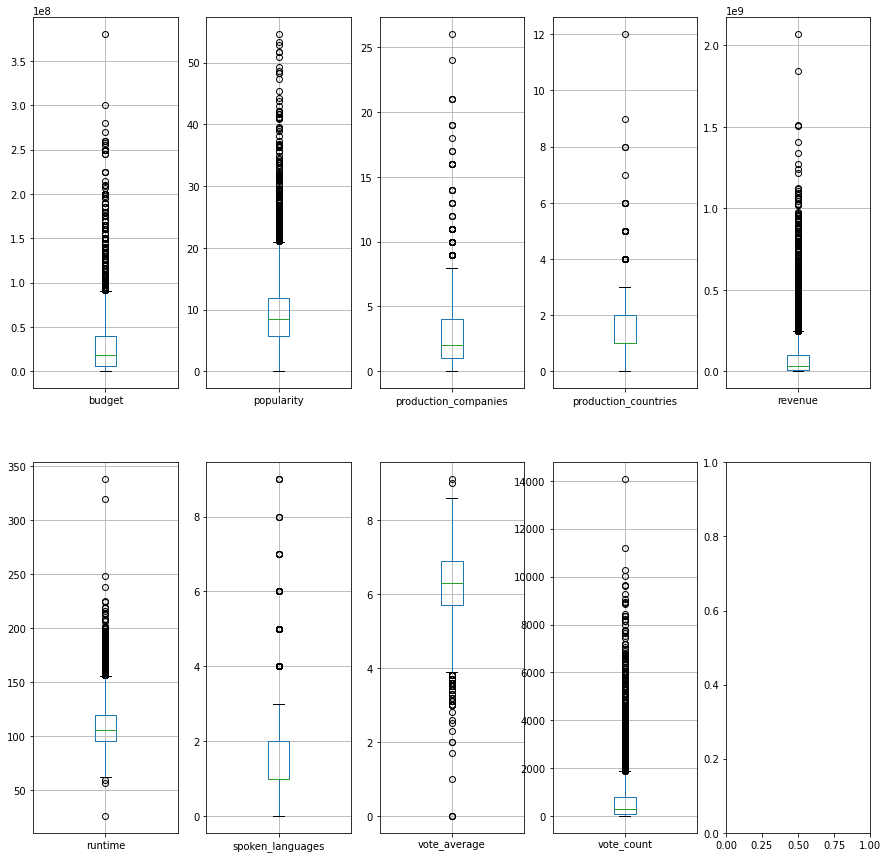

In [28]:
# make a boxplot for each numeric column in a different subplot

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))
i = 0
for col in df.columns:
    if col in ['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'production_companies', 'production_countries', 'spoken_languages']:
        df.boxplot(column=col, ax=axes[i // 5, i % 5])
        i += 1
# df.boxplot(column=['popularity', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count'])

## Amount of Repeated Movies

In [4]:
print("Repeated rows: {}".format(df.duplicated().sum()))

Repeated rows: 263
